# ANÁLISIS EXPLORATORIO DE DATOS CON PYTHON

Breve análisis utilizando pandas y seaborn.

In [8]:
#Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('adult.data.csv')

### Chequeando datos del dataset 

In [4]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Análisis de los datos

In [7]:
# ¿Cuantas personas de cada raza se encuentran representados en este dataset?

race_count = df['race'].value_counts()

race_count

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

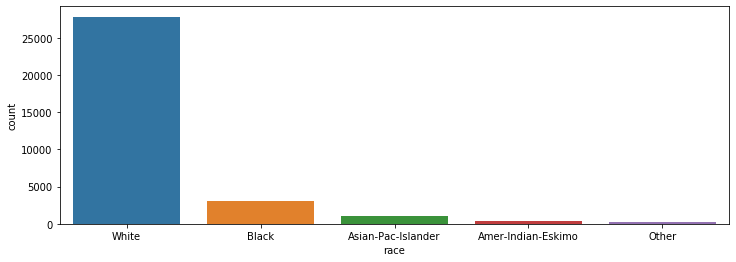

In [9]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x="race")

In [10]:
# ¿Cuál es la edad promedio de los hombres?

average_age_men = round(df[df['sex'] == 'Male']['age'].values.mean(), 1)
average_age_men

39.4

In [13]:
# ¿Cuál es el porcentaje de personas que tienen un título de grado (Bachelors)?

percentage_bachelors = round(100 * len(df[df['education'] == 'Bachelors'])/len(df.index), 1)
percentage_bachelors #16.4%

16.4

In [16]:
# ¿Qué porcentaje de personas con educación de grado o postgrado reciben un salario mayor a 50000 dólares anuales?

# Con título de grado o postgrado
higher_education = df[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]

# Sin título de grado
lower_education = df[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]

# Calculando los porcentajes
higher_education_salary = round(100 * len(higher_education[higher_education['salary'] == '>50K']) / len(higher_education), 1)
lower_education_salary =  round(100 * len(lower_education[lower_education['salary'] == '>50K']) / len(lower_education), 1)



print ("Porcentaje de personas con educación avanzada que reciben un sueldo mayor a 50k: ", higher_education_salary, "%")
print ("Porcentaje de personas sin educación avanzada que reciben un sueldo mayor a 50k: ", lower_education_salary, "%")


Porcentaje de personas con educación avanzada que reciben un sueldo mayor a 50k:  46.5 %
Porcentaje de personas sin educación avanzada que reciben un sueldo mayor a 50k:  17.4 %


In [18]:
# ¿Cuál es la menor cantidad de horas que una persona trabajo por semana?

min_work_hours = df['hours-per-week'].min()
print(min_work_hours, "horas")

1 horas


In [22]:
# ¿Cual es el porcentaje de personas que trabajan la cantidad mínima de horas, con un salario >50k?

num_min_workers = df[df['hours-per-week'] == min_work_hours]
salary_percentage = round(100 * len(num_min_workers[num_min_workers['salary'] == '>50K']) / len(num_min_workers), 1)

print(salary_percentage, "%")

10.0 %


In [32]:
# ¿Que país tiene el más alto porcentaje de personas con salarios >100k?

# df[df['salary'] == '>100K'] condición 

people_over50k = df[df['salary'] == '>50K']['native-country'].value_counts()
people_total = df['native-country'].value_counts()

perc_over50k = people_over50k/people_total

perc_over50k

?                             0.250429
Cambodia                      0.368421
Canada                        0.322314
China                         0.266667
Columbia                      0.033898
Cuba                          0.263158
Dominican-Republic            0.028571
Ecuador                       0.142857
El-Salvador                   0.084906
England                       0.333333
France                        0.413793
Germany                       0.321168
Greece                        0.275862
Guatemala                     0.046875
Haiti                         0.090909
Holand-Netherlands                 NaN
Honduras                      0.076923
Hong                          0.300000
Hungary                       0.230769
India                         0.400000
Iran                          0.418605
Ireland                       0.208333
Italy                         0.342466
Jamaica                       0.123457
Japan                         0.387097
Laos                     

In [36]:
# Encontrando el país con mayor ratio (perc_over100k)

highest_earning_country = perc_over50k[perc_over50k.values == perc_over50k.max()].index[0]
highest_earning_country_percentage = round(100 * perc_over50k.max(), 1)

print("País: ", highest_earning_country)
print("Porcentaje: ", highest_earning_country_percentage, "%")

País:  Iran
Porcentaje:  41.9 %


In [38]:
# Ocupación más popular de las personas que ganan >50k en Japon

japan = df[df['native-country'] == 'Japan']
japan_over50k = japan[japan['salary'] == '>50K']
occupation_counts = japan_over50k['occupation'].value_counts()

occupation_counts

Exec-managerial    13
Other-service       3
Prof-specialty      3
Sales               2
?                   1
Craft-repair        1
Adm-clerical        1
Name: occupation, dtype: int64

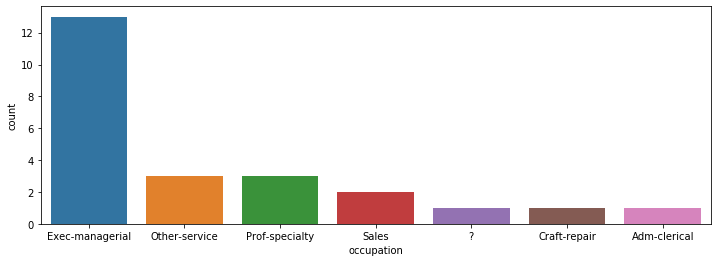

In [41]:
plt.figure(figsize=(12,4))
sns.countplot(x= "occupation", 
              data=japan_over50k, 
              order = japan_over50k["occupation"].value_counts().index)

### Reporte con las variables calculadas

In [48]:
print("Número de cada raza:", race_count)
print("\n")
print("Edad promedio de los hombres:", average_age_men)
print("\n")
print(f"Porcentaje con Bachelors degrees: {percentage_bachelors}%")
print("\n")
print(f"Porcentaje con educacion superior que ganan >50K: {higher_education_salary}%")
print("\n")
print(f"Porcentaje sin educacion superior que ganan >50K: {lower_education_salary}%")
print("\n")
print(f"Tiempo de trabajo mínimo: {min_work_hours} hours/week")
print("\n")
print(f"Porcentage de ingresos mas altos con horas mínimas: {salary_percentage}%")
print("\n")
print("País con mayor porcentage de personas con altos ingresos:", highest_earning_country)
print("\n")
print(f"Porcentaje más alto de ricos: {highest_earning_country_percentage}%")
print("\n")
print("Profesión promedio con mayores ingresos:", occupation_counts[occupation_counts.values == occupation_counts.max()].index[0])

Número de cada raza: White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


Edad promedio de los hombres: 39.4


Porcentaje con Bachelors degrees: 16.4%


Porcentaje con educacion superior que ganan >50K: 46.5%


Porcentaje sin educacion superior que ganan >50K: 17.4%


Tiempo de trabajo mínimo: 1 hours/week


Porcentage de ingresos mas altos con horas mínimas: 10.0%


País con mayor porcentage de personas con altos ingresos: Iran


Porcentaje más alto de ricos: 41.9%


Profesión promedio con mayores ingresos: Exec-managerial
